# Codealpha task#2 | Diabetes Prediction Using Medical Dataset | Machine Learning | Classification Problem

## Importing Necessory Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm, classification_report as cr
%matplotlib inline

# Create  DataFrame Of CSV file

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.shape

(100000, 9)

# Exploratory Data Analysis

In [4]:
df.columns
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [5]:
def print_unique(df):
     for col in df:
         print(f"{col} : {df[col].unique()}")
print_unique(df)

gender : ['Female' 'Male' 'Other']
age : [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280

## Transforming Age column 

In [6]:
std=df['age'].std()
mean=df['age'].mean()

# Removing One Standard Deviation to remove Outliers

In [7]:
high=1*(mean+std)
low=1*(mean-std)
low,high
df2=df[(df.age > low)]

Text(0.5, 1.0, 'After Outlier Removal')

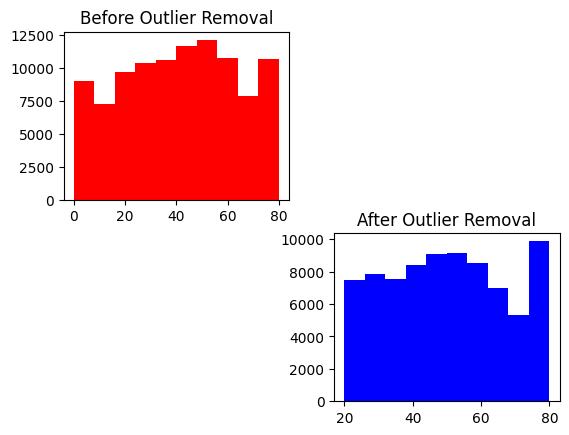

In [8]:
plt.subplot(2,2,1)
plt.hist(df['age'],color='red')
plt.title("Before Outlier Removal")
plt.subplot(2,2,4)
plt.hist(df2['age'],color='blue')
plt.title("After Outlier Removal")

In [9]:
print_unique(df2)

gender : ['Female' 'Male' 'Other']
age : [80. 54. 28. 36. 76. 20. 44. 79. 42. 32. 53. 78. 67. 37. 40. 69. 72. 30.
 45. 43. 50. 41. 26. 34. 73. 77. 66. 29. 60. 38. 57. 74. 46. 21. 59. 27.
 56. 55. 62. 47. 68. 75. 22. 58. 24. 25. 33. 61. 31. 49. 39. 65. 70. 48.
 51. 71. 64. 63. 52. 35. 23.]
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 4.  6.2 9.  7.  8.8 8.2 4.5 7.5 6.8]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes : [0 1]


# Transforming BMI column

Text(0.5, 1.0, 'Before Outlier Removal')

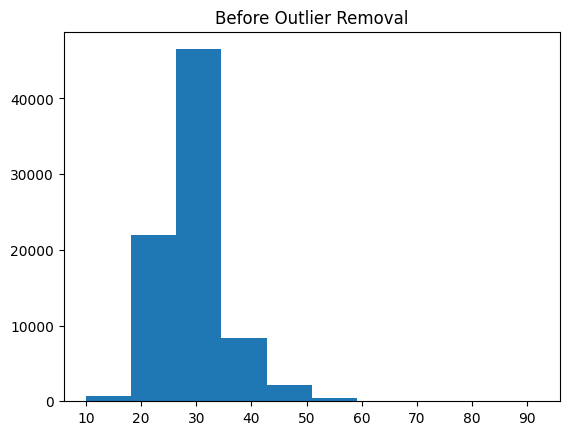

In [10]:
plt.hist(df2.bmi)
plt.title("Before Outlier Removal")

# Using One standard deviation to remove outliers

In [11]:
std1=df2['bmi'].std()
mean=df2['bmi'].mean()
low=(mean-std)
high=(mean+std)
low,high
df3=df2[(df2.bmi <= high) & (df2.bmi >= low)]

Text(0.5, 1.0, 'After Applying One STD')

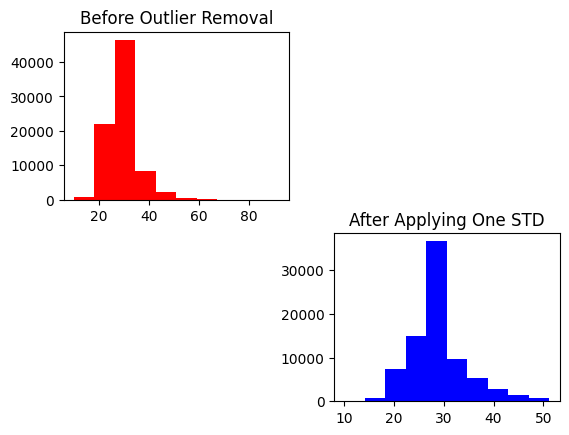

In [12]:
plt.subplot(2,2,1)
plt.hist(df2.bmi,color='red')
plt.title("Before Outlier Removal")
plt.subplot(2,2,4)
plt.hist(df3['bmi'],color='blue')
plt.title("After Applying One STD")

# Using Z-Score and Median absolute deviation to remove outliers

In [13]:
median=df3['bmi'].median()
df3['bm_he']=abs(df3['bmi']-median)
mad=df3['bm_he'].median()

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_7524\3268716002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bm_he']=abs(df3['bmi']-median)


In [14]:
df3['modi_zscore']=0.6745*(df3.bm_he-median)/mad
df4=df3[(df3['modi_zscore'] <= -3.5)]

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_7524\3002384734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['modi_zscore']=0.6745*(df3.bm_he-median)/mad


Text(0.5, 1.0, 'After Applying Z-score')

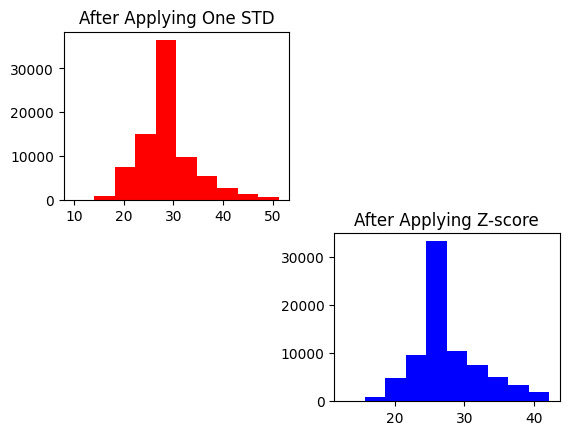

In [15]:
plt.subplot(2,2,1)
plt.hist(df3['bmi'],color='red')
plt.title("After Applying One STD")
plt.subplot(2,2,4)
plt.hist(df4.bmi,color='blue')
plt.title('After Applying Z-score')

In [16]:
df4['bmi'].describe()

count    77273.00000
mean        27.96480
std          4.69186
min         12.73000
25%         25.52000
50%         27.32000
75%         30.05000
max         42.23000
Name: bmi, dtype: float64

In [17]:
print_unique(df4)

gender : ['Female' 'Male' 'Other']
age : [80. 54. 28. 36. 76. 20. 44. 79. 42. 32. 53. 78. 67. 37. 40. 69. 72. 30.
 45. 43. 50. 41. 26. 73. 77. 66. 29. 60. 38. 57. 74. 46. 21. 59. 27. 56.
 34. 55. 62. 47. 68. 75. 22. 58. 24. 25. 33. 61. 31. 49. 39. 65. 70. 48.
 51. 71. 64. 63. 52. 35. 23.]
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [25.19 27.32 23.45 ... 41.37 14.79 17.56]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 5.8 3.5 6.  4.  6.2 9.  7.  8.2 4.5 7.5 6.8 8.8]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes : [0 1]
bm_he : [ 2.13  0.    3.87 ... 12.49 14.05  9.76]
modi_zscore : [-7.10906067 -7.7101841  -6.61800209 ... -4.18528661 -3.7450272
 -4.95574059]


# Transforming Gender Columns

In [18]:
def transform_gender(df):
    list=[]
    new_df=df['gender']
    for i in new_df:
        if(i=='Female'):
            list.append(1)
        elif(i=='Male'):
            list.append(0)
        else:
            list.append(2)
    df['gender']=list
    return df

In [19]:
df5=transform_gender(df4)
df5.head()

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_7524\3293396349.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=list


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bm_he,modi_zscore
0,1,80.0,0,1,never,25.19,6.6,140,0,2.13,-7.109061
1,1,54.0,0,0,No Info,27.32,6.6,80,0,0.00,-7.710184
2,0,28.0,0,0,never,27.32,5.7,158,0,0.00,-7.710184
3,1,36.0,0,0,current,23.45,5.0,155,0,3.87,-6.618002
4,0,76.0,1,1,current,20.14,4.8,155,0,7.18,-5.683862


In [20]:
df5=df5.drop(columns=['bm_he',"modi_zscore"])

In [21]:
print_unique(df5)

gender : [1 0 2]
age : [80. 54. 28. 36. 76. 20. 44. 79. 42. 32. 53. 78. 67. 37. 40. 69. 72. 30.
 45. 43. 50. 41. 26. 73. 77. 66. 29. 60. 38. 57. 74. 46. 21. 59. 27. 56.
 34. 55. 62. 47. 68. 75. 22. 58. 24. 25. 33. 61. 31. 49. 39. 65. 70. 48.
 51. 71. 64. 63. 52. 35. 23.]
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [25.19 27.32 23.45 ... 41.37 14.79 17.56]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 5.8 3.5 6.  4.  6.2 9.  7.  8.2 4.5 7.5 6.8 8.8]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes : [0 1]


# Tranform HBA1c Column

# Using One standard deviation remove outliers

In [22]:
std=df5['HbA1c_level'].std()
mean=df5['HbA1c_level'].mean()
high=1*(mean+std)
low=1*(mean-std)

In [23]:
df5['HbA1c_level'].describe()

count    77273.000000
mean         5.544837
std          1.083737
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

In [24]:
df5.shape

(77273, 9)

In [25]:
df6=df5[(df5.HbA1c_level <= high)]
df6.shape

(73833, 9)

Text(0.5, 1.0, 'After Outlier Removal')

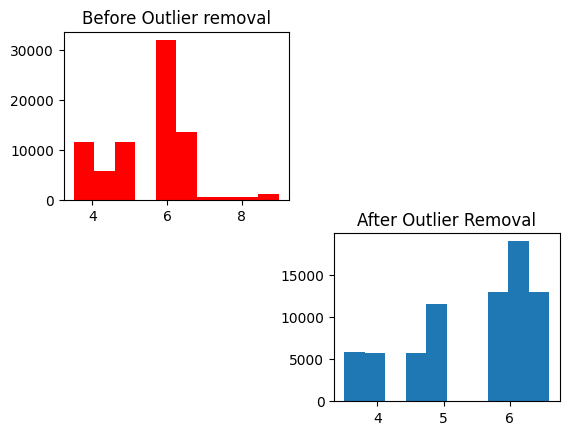

In [26]:
plt.subplot(2,2,1)
plt.hist(df5['HbA1c_level'],color='red')
plt.title("Before Outlier removal")
plt.subplot(2,2,4)
plt.hist(df6['HbA1c_level'])
plt.title("After Outlier Removal")

In [27]:
df6['HbA1c_level'].describe()

count    73833.000000
mean         5.434955
std          0.961608
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          6.600000
Name: HbA1c_level, dtype: float64

# After Removal of outliers from hbA1c column now my data is linearly distributed

In [28]:
print_unique(df6)

gender : [1 0 2]
age : [80. 54. 28. 36. 76. 20. 44. 79. 42. 32. 53. 78. 67. 37. 40. 69. 72. 30.
 45. 43. 50. 41. 26. 77. 66. 29. 60. 38. 57. 74. 46. 21. 59. 27. 56. 34.
 55. 62. 47. 68. 75. 22. 58. 24. 25. 33. 31. 49. 39. 65. 70. 48. 51. 71.
 64. 63. 52. 35. 61. 73. 23.]
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [25.19 27.32 23.45 ... 41.37 14.79 17.56]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 5.8 3.5 6.  4.  6.2 4.5]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 280 300 240]
diabetes : [0 1]


# Transforming Blood glucose level column

In [29]:
df6.blood_glucose_level.describe()

count    73833.000000
mean       136.328227
std         38.792918
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

Text(0.5, 1.0, 'Before Outlier Removal')

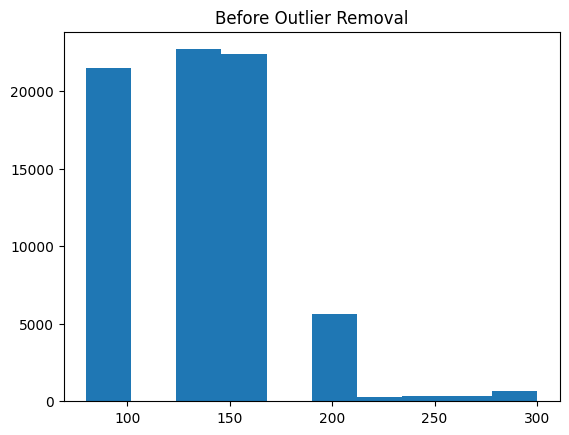

In [30]:
plt.hist(df6['blood_glucose_level'])
plt.title("Before Outlier Removal")

# Using percentile to remove outliers

In [31]:
hight=df6['blood_glucose_level'].quantile(0.95)
df7=df6[(df6['blood_glucose_level']<= hight)]

Text(0.5, 1.0, 'After Applying percentile')

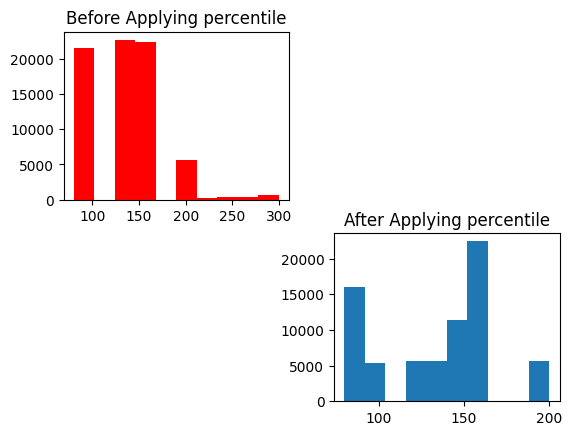

In [32]:
plt.subplot(2,2,1)
plt.hist(df6['blood_glucose_level'],color='red')
plt.title("Before Applying percentile")
plt.subplot(2,2,4)
plt.hist(df7['blood_glucose_level'])
plt.title("After Applying percentile")

In [33]:
print_unique(df7)

gender : [1 0 2]
age : [80. 54. 28. 36. 76. 20. 44. 79. 42. 32. 53. 78. 67. 37. 40. 69. 72. 30.
 45. 43. 50. 41. 26. 77. 66. 29. 60. 38. 57. 74. 46. 21. 59. 27. 56. 34.
 55. 62. 47. 68. 75. 22. 58. 24. 25. 33. 31. 49. 39. 65. 70. 48. 51. 71.
 64. 63. 52. 35. 61. 73. 23.]
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [25.19 27.32 23.45 ... 41.37 14.79 17.56]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 5.8 3.5 6.  4.  6.2 4.5]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90]
diabetes : [0 1]


# Dropping Unnecessory Columns

In [34]:
df7.drop(columns='smoking_history',inplace=True)

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_7524\3339142588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop(columns='smoking_history',inplace=True)


In [35]:
print_unique(df7)

gender : [1 0 2]
age : [80. 54. 28. 36. 76. 20. 44. 79. 42. 32. 53. 78. 67. 37. 40. 69. 72. 30.
 45. 43. 50. 41. 26. 77. 66. 29. 60. 38. 57. 74. 46. 21. 59. 27. 56. 34.
 55. 62. 47. 68. 75. 22. 58. 24. 25. 33. 31. 49. 39. 65. 70. 48. 51. 71.
 64. 63. 52. 35. 61. 73. 23.]
hypertension : [0 1]
heart_disease : [1 0]
bmi : [25.19 27.32 23.45 ... 41.37 14.79 17.56]
HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 5.8 3.5 6.  4.  6.2 4.5]
blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90]
diabetes : [0 1]


# Analyzing Diabetes rate

# The below Pie chart Showing the gender wise distribution in data

Text(0.5, 1.0, 'Gender Wise Distribution')

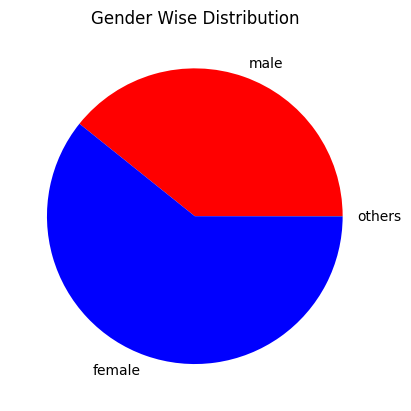

In [36]:
df_male=df7[df7.gender==0]
df_female=df7[df7.gender==1]
df_others=df7[df7.gender==2]
male=df_male.shape[0]
female=df_female.shape[0]
others=df_others.shape[0]
plt.pie([male,female,others],labels=['male','female','others'],colors=['red','blue','green'])
plt.title("Gender Wise Distribution")

# Analyzing Gender wise rate of Diabetes and non Diabetes Patient

(array([ 0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

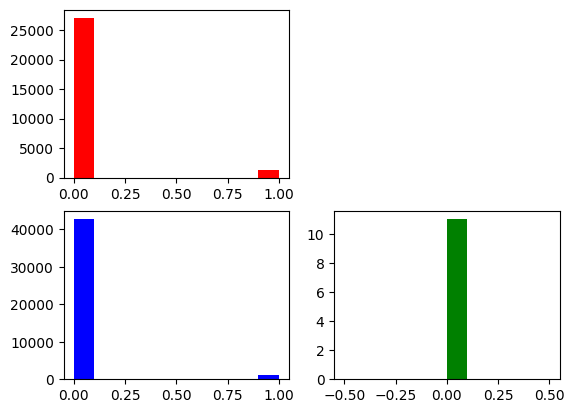

In [37]:
plt.subplot(2,2,1)
plt.hist(df_male.diabetes,color='red')
plt.subplot(2,2,3)
plt.hist(df_female.diabetes,color='blue')
plt.subplot(2,2,4)
plt.hist(df_others.diabetes,color='green')

# After analyzing the diabates columns We conclude that our data is imbalance 

# Using Oversampling technique to balance the dataset

In [38]:
df_0=df7[df7.diabetes==0]
df_1=df7[df7.diabetes==1]
value_00=df_0.shape[0]
value_11=df_1.shape[0]
value_00,value_11

(69732, 2488)

In [39]:
df_1_over=df_1.sample(value_00,replace=True)

In [40]:
df8=pd.concat([df_0,df_1_over],axis=0)
df8.shape

(139464, 8)

In [41]:
df_0=df8[df8.diabetes==0]
df_1=df8[df8.diabetes==1]
value_0=df_0.shape[0]
value_1=df_1.shape[0]
value_0,value_1

(69732, 69732)

Text(0.5, 1.0, 'Ratio Between Diabetes and Non Diabetes(After OverSampling)')

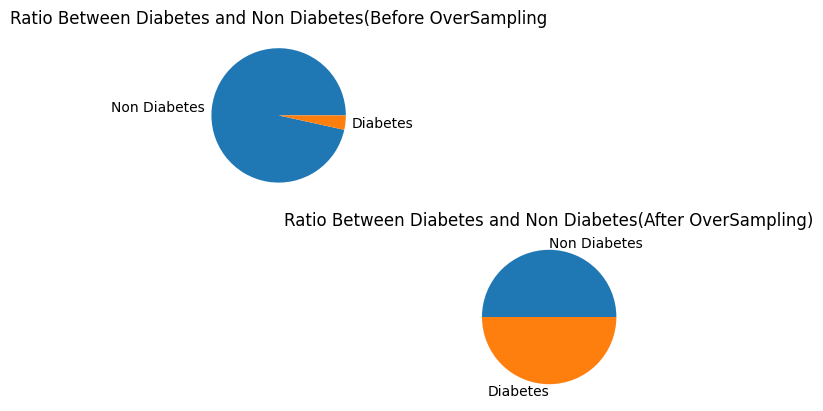

In [42]:
plt.subplot(2,2,1)
plt.pie([value_00,value_11],labels=["Non Diabetes","Diabetes"])
plt.title("Ratio Between Diabetes and Non Diabetes(Before OverSampling")
plt.subplot(2,2,4)
plt.pie([value_0,value_1],labels=["Non Diabetes","Diabetes"])
plt.title("Ratio Between Diabetes and Non Diabetes(After OverSampling)")

# Data PreProcessing , Sacling

In [43]:
print_unique(df8)

gender : [1 0 2]
age : [80. 54. 28. 36. 76. 20. 79. 42. 32. 53. 78. 67. 37. 40. 69. 72. 30. 45.
 43. 50. 41. 26. 77. 66. 44. 29. 60. 38. 57. 74. 46. 21. 59. 27. 56. 34.
 55. 62. 47. 68. 75. 22. 58. 24. 25. 33. 31. 49. 39. 65. 70. 48. 51. 71.
 52. 63. 35. 61. 73. 23. 64.]
hypertension : [0 1]
heart_disease : [1 0]
bmi : [25.19 27.32 23.45 ... 42.15 12.91 13.2 ]
HbA1c_level : [6.6 5.7 5.  4.8 6.1 5.8 3.5 6.  6.5 4.  6.2 4.5]
blood_glucose_level : [140  80 158 155  85 145 100 130 200 160 126 159  90]
diabetes : [0 1]


In [44]:
df8.age.describe()

count    139464.000000
mean         55.347660
std          17.094783
min          20.000000
25%          43.000000
50%          57.000000
75%          69.000000
max          80.000000
Name: age, dtype: float64

In [45]:
df8['age']=df8['age']/100
df8['bmi']=df8['bmi']/100
df8['blood_glucose_level']=df8['blood_glucose_level']/100

In [46]:
df8.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0.80,0,1,0.2519,6.6,1.40,0
1,1,0.54,0,0,0.2732,6.6,0.80,0
2,0,0.28,0,0,0.2732,5.7,1.58,0
3,1,0.36,0,0,0.2345,5.0,1.55,0
4,0,0.76,1,1,0.2014,4.8,1.55,0


In [47]:
print_unique(df8)

gender : [1 0 2]
age : [0.8  0.54 0.28 0.36 0.76 0.2  0.79 0.42 0.32 0.53 0.78 0.67 0.37 0.4
 0.69 0.72 0.3  0.45 0.43 0.5  0.41 0.26 0.77 0.66 0.44 0.29 0.6  0.38
 0.57 0.74 0.46 0.21 0.59 0.27 0.56 0.34 0.55 0.62 0.47 0.68 0.75 0.22
 0.58 0.24 0.25 0.33 0.31 0.49 0.39 0.65 0.7  0.48 0.51 0.71 0.52 0.63
 0.35 0.61 0.73 0.23 0.64]
hypertension : [0 1]
heart_disease : [1 0]
bmi : [0.2519 0.2732 0.2345 ... 0.4215 0.1291 0.132 ]
HbA1c_level : [6.6 5.7 5.  4.8 6.1 5.8 3.5 6.  6.5 4.  6.2 4.5]
blood_glucose_level : [1.4  0.8  1.58 1.55 0.85 1.45 1.   1.3  2.   1.6  1.26 1.59 0.9 ]
diabetes : [0 1]


# Now Data Transformation , Cleaning , Pre Processing is done , and I am starting to build model

## Creating X and Y columns

In [48]:
df8.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0.80,0,1,0.2519,6.6,1.40,0
1,1,0.54,0,0,0.2732,6.6,0.80,0
2,0,0.28,0,0,0.2732,5.7,1.58,0
3,1,0.36,0,0,0.2345,5.0,1.55,0
4,0,0.76,1,1,0.2014,4.8,1.55,0


In [49]:
y=df8[['diabetes']]
x=df8.drop(columns='diabetes')

# Splitting Dataset Into training and testing part

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((111571, 7), (27893, 7), (111571, 1), (27893, 1))

# Developing Machine Learning Model Using RandomForestClassifier to Classify the Data 

In [51]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

# Test Model on test dataset and got accuracy of 98.7 Percent 

In [53]:
accuracy=round(((model.score(x_test,y_test))*100),2)
accuracy

98.76

In [54]:
prediction=model.predict(x_test)

# Classification Report , Got Precision , Recall and F1 score above 99 percent 

In [55]:
print(cr(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13956
           1       0.98      1.00      0.99     13937

    accuracy                           0.99     27893
   macro avg       0.99      0.99      0.99     27893
weighted avg       0.99      0.99      0.99     27893



# Confusion Matrix to analyze the accuracy

Text(0.5, 1.0, 'Confusion Matrix')

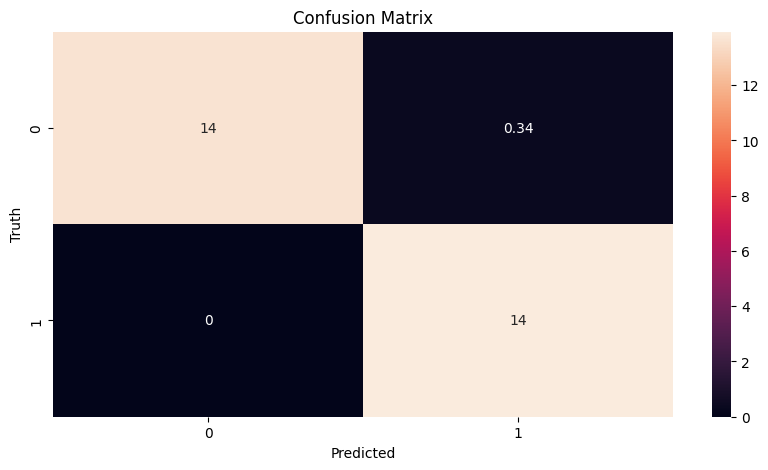

In [57]:
cmm=cm(y_test,prediction)/1000
plt.figure(figsize=(10,5))
sb.heatmap(cmm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")

In [58]:
x_test.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
56374,1,0.53,0,0,0.3592,6.6,1.26
95368,0,0.25,0,0,0.3322,6.5,1.45
11690,0,0.28,0,0,0.2732,4.5,1.55
41834,1,0.71,0,0,0.3003,6.6,1.40
98996,1,0.62,0,0,0.2423,5.7,2.00


In [59]:
y_test.head()

,diabetes
56374,1
95368,0
11690,0
41834,1
98996,1


# Define a function which will predict the output

In [85]:
def prediction(gender,age,hyper_tension,heart_disease,bmi,hba1c,blood_glucose):
    l=[]
    if gender.title()=='Female':
        l.append(1)
    elif gender.title()=='Other':
        l.append(2)
    else:
        l.append(0)
    tension=1 if hyper_tension.title()=='Yes' else 0
    heart_prob=1 if heart_disease.title() == 'Yes' else 0
    gender=l[0]
    age=age/100
    bmi=bmi/100
    blood_glucose=blood_glucose/100
    return model.predict([[gender,age,tension,heart_prob,bmi,hba1c,blood_glucose]]),model.predict_proba([[gender,age,tension,heart_prob,bmi,hba1c,blood_glucose]])

In [67]:
import joblib
joblib.dump(model,'saved_model.pkl')

['saved_model.pkl']

In [87]:
value,prob=prediction('male',50,'yes','no',10,10,190)

C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.72